In [1]:
import pandas as pd


In [2]:
df = pd.read_csv(r'\\trllimited\data\Vehicle_Validation_SCANNER\Accreditation\2023\WDM\RAV16\Plates\LONG-PM-NS-R1_R16_230302151337_S1_TEX.dat')
#df = pd.read_csv(r'/Users/royj/development/LONG-PM-NS-R1_R09_230302094024_S1_TEX.dat')
#df = pd.read_csv(r'\\trllimited\data\INF_TRACS\TRACS5\1 - Accreditation\RAV17\5-Accreditation-May23\CC Output\TRACS4\Plates\Texture\RAV17_NS_Run_1_A.dat')
# df = pd.read_csv(r'\\trllimited\data\Vehicle_Validation_SCANNER\Accreditation\2023\PTS\MFV1 resubmission\ProfileMats\LONG-PM-NS-R2_rcd_AB1_tex.dat')
#df = pd.read_csv(r'\\trllimited\data\Vehicle_Validation_SCANNER\Accreditation\2023\PTS\MFV2 sumbission2\ProfileMats\LONG-PM-NS-R1_AB1_tex.dat')

In [3]:
minimum_texture = min(df.Texture)

adjustment_value = abs(minimum_texture)

#df.adjusted_Tex = df.Texture + adjustment_value
df['adjusted_Tex'] = df.apply(lambda row: row.Texture + adjustment_value, axis=1)

readings_per_metre = len(df.Chainage) / max(df.Chainage)
print("readings per metre", readings_per_metre)
hertz = readings_per_metre/2
print("hertz", hertz)

readings per metre 1005.7701842080384
hertz 502.8850921040192


8666


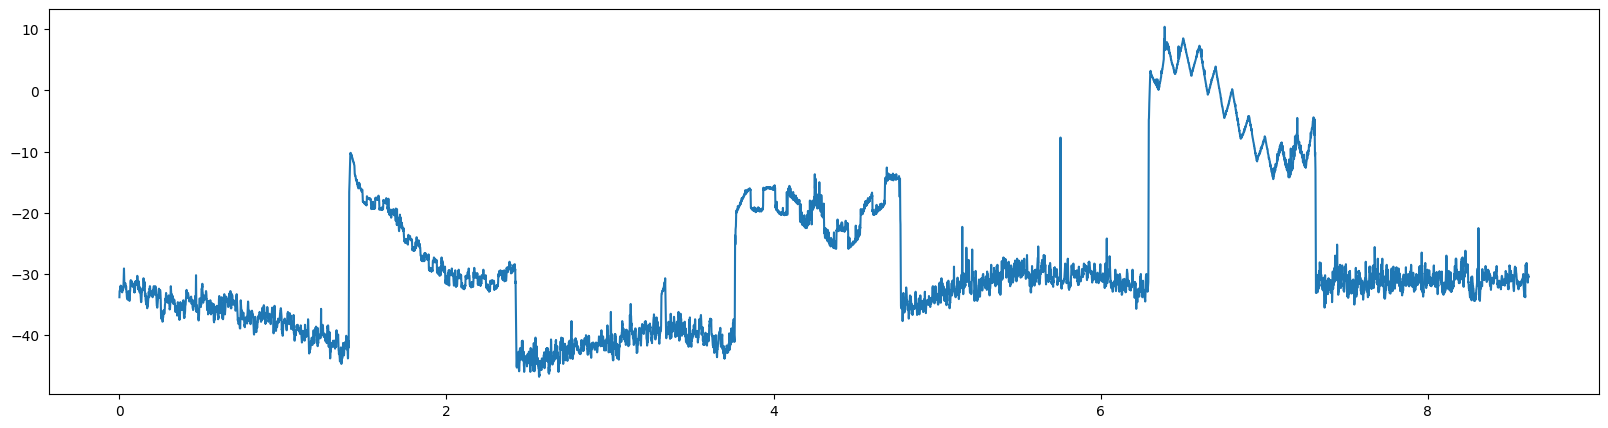

In [4]:
from matplotlib import pyplot as plt
import matplotlib as mpl


print(len(df.Chainage))
plt.subplots(figsize=(20,5))
plt.plot(df.Chainage, df.Texture)

In [4]:
%pip install pywt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import pywt

from scipy.optimize import curve_fit

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import scipy 


ModuleNotFoundError: No module named 'pywt'

In [ ]:


idx = np.linspace(0,len(x)-1,5).astype(int)
X = np.array(df.Texture).reshape(-1,1)
pf = PolynomialFeatures(3)
X = pf.fit_transform(X)
# y = 1 * x_0 + 2 * x_1 + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)
plt.plot(x,reg.predict(X),label='Polynomial Regression',color='firebrick')
plt.plot(x,y,label='Real Data',color='navy')
plt.plot(x,reg.predict(X)-y,label='Difference',color='darkorange')
plt.legend()
#plt.xticks(x[idx],x[idx],rotation=45)
plt.xlabel('Time')
plt.ylabel('Price')

In [6]:
import numpy as np
from scipy import signal

np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

In [15]:
from sklearn.decomposition import PCA, FastICA

X =df[['Texture']].copy()
# Compute ICA
# ica = FastICA(n_components=3, whiten="arbitrary-variance")
ica = FastICA(n_components=2, whiten="arbitrary-variance")
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
#pca = PCA(n_components=3)
#H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

c:\Users\rjaques\AppData\Local\Continuum\anaconda3\envs\p3_12_1\Lib\site-packages\sklearn\decomposition\_fastica.py:582: UserWarning: n_components is too large: it will be set to 1
  warnings.warn(


<Figure size 640x480 with 0 Axes>

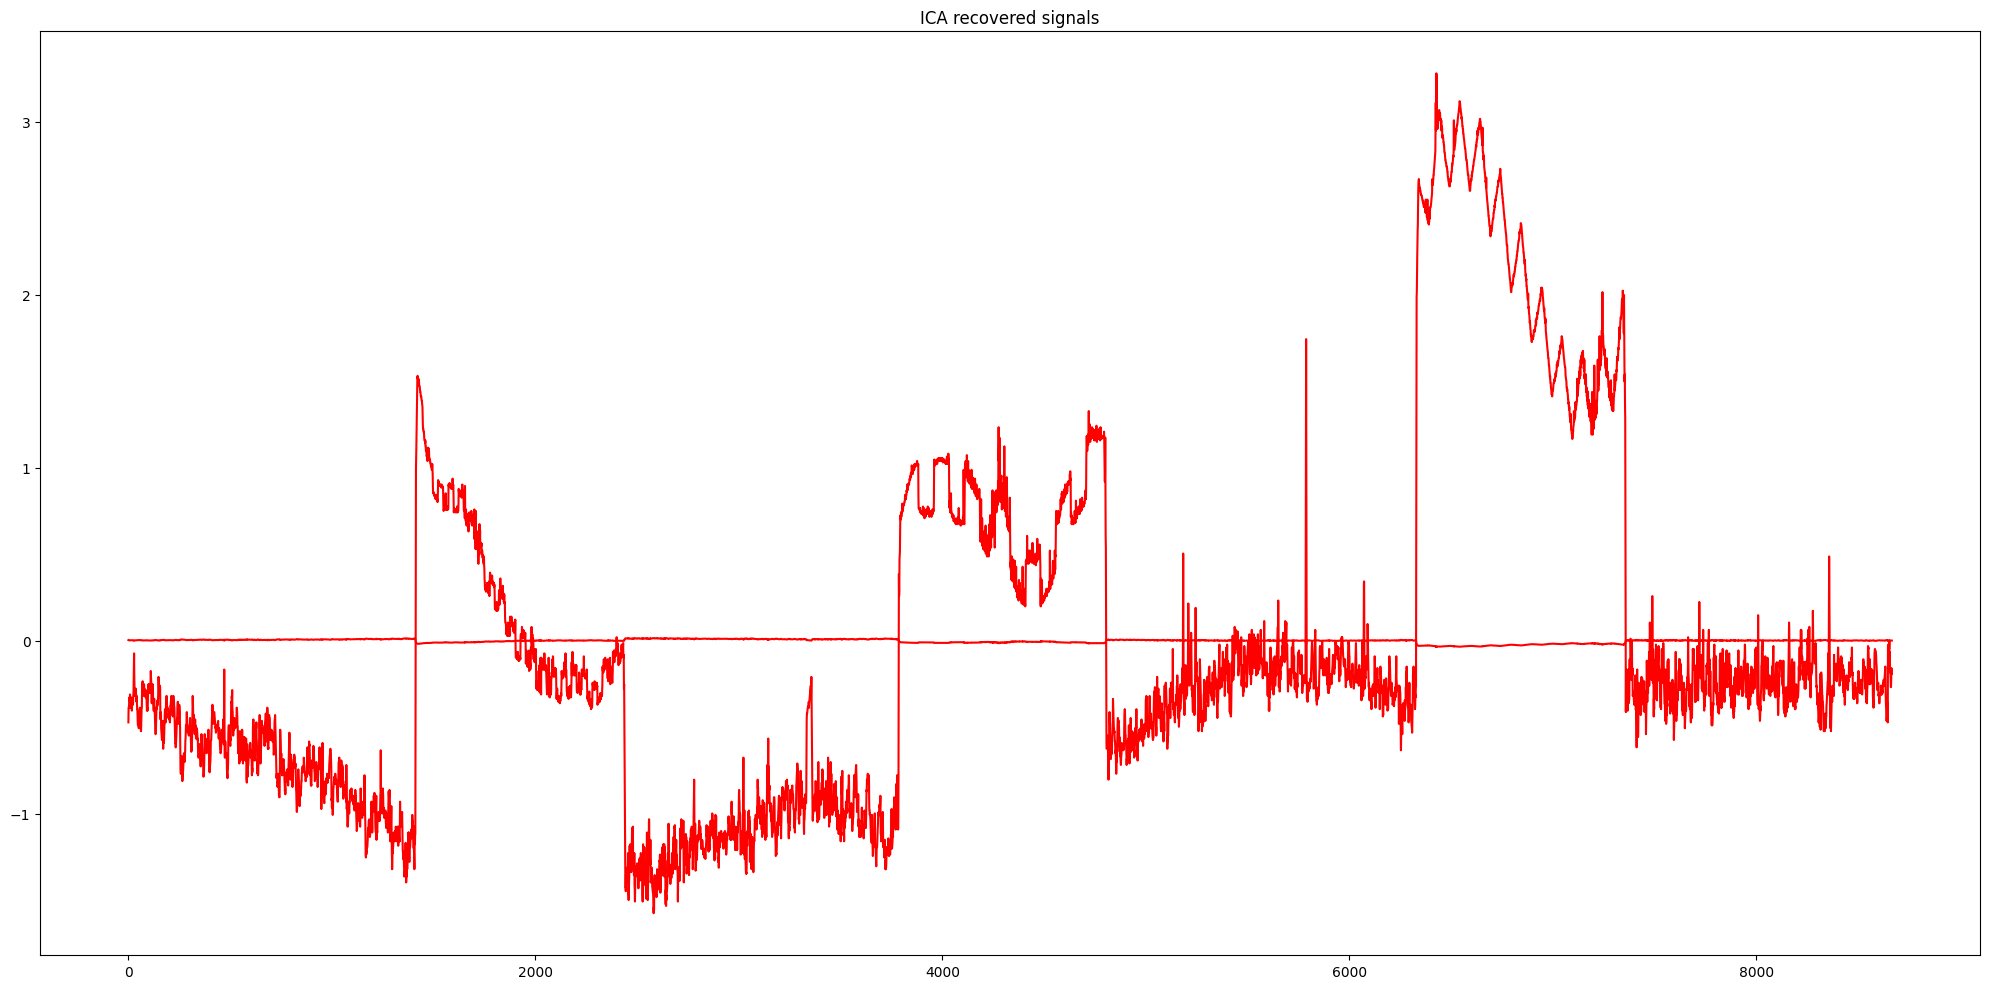

In [35]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplots(figsize=(20,10))

#models = [X, S, S_, H]
models = [X, S_]
names = [
    "Observations (mixed signal)",
#    "True Sources",
    "ICA recovered signals",
#    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    #plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

[1.]


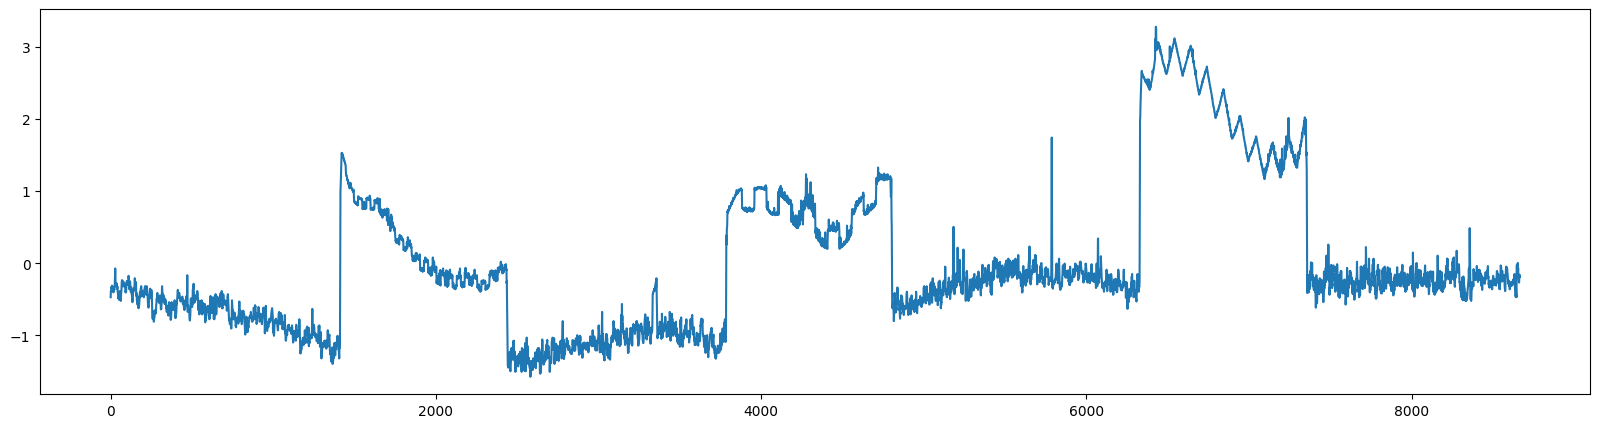

In [31]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

X =df[['Texture']].to_numpy()

X = preprocessing.StandardScaler().fit_transform(X)

pca = PCA(n_components=1)

X_pca = pca.fit_transform(X)

print(pca.explained_variance_ratio_)

pca.fit_transform(X)
plt.subplots(figsize=(20,5))
plt.plot(X_pca)

<Figure size 640x480 with 0 Axes>

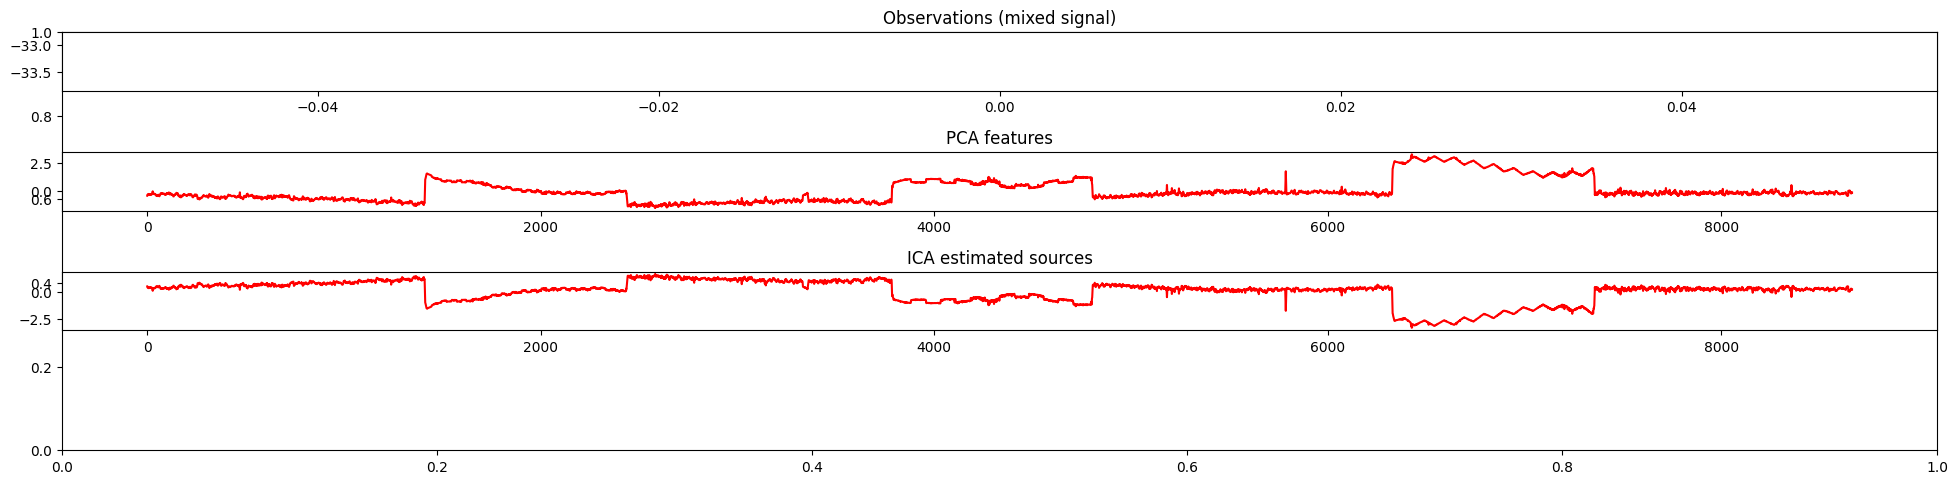

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA

# Standardize the data
#df_X = pd.DataFrame(df['Texture'] - np.mean(df['Texture'], axis=0)) / np.std(df['Texture'], axis=0)
df_X = pd.DataFrame(df.Texture - np.mean(df.Texture, axis=0)) / np.std(df.Texture, axis=0)

# Use PCA to reduce the dimensionality of the data
#pca = PCA(n_components='mle')
pca = PCA()

X_pca = pca.fit_transform(df_X)

# Use ICA to separate the sources from the mixed signal
ica = FastICA()
X_ica = ica.fit_transform(df_X) # Estimated sources

# Plot the results
plt.figure()

models = [df.Texture, X_pca, X_ica]
names = ['Observations (mixed signal)',
         'PCA features', 'ICA estimated sources']
colors = ['red', 'steelblue']
plt.subplots(figsize=(20,5))
for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

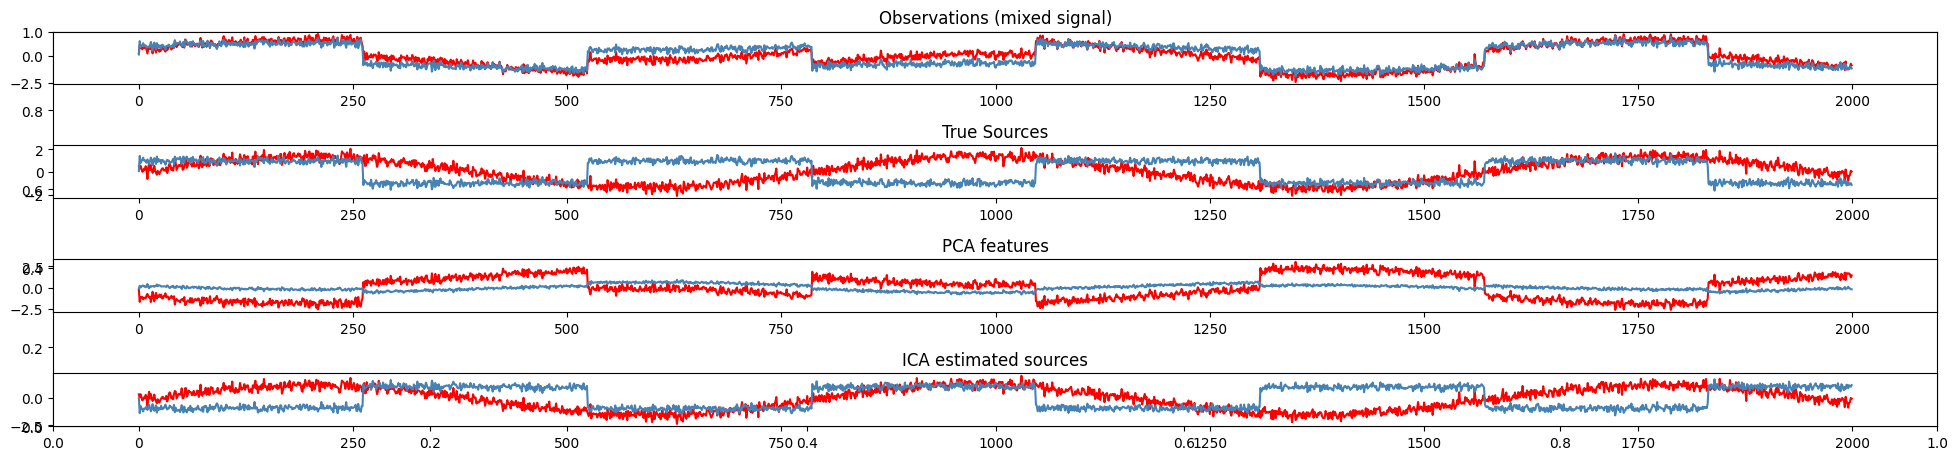

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Generate a synthetic dataset with two independent sources
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time) # Source 1: sine wave
s2 = np.sign(np.sin(3 * time)) # Source 2: square wave

S = np.c_[s1, s2]
S += 0.2 * np.random.normal(size=S.shape) # Add noise to the sources
S /= S.std(axis=0) # Standardize the sources

# Mix the sources together to create a mixed signal
A = np.array([[0.5, 0.5], [0.2, 0.8]]) # Mixing matrix
X = np.dot(S, A.T) # Mixed signal

# Standardize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Use PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Use ICA to separate the sources from the mixed signal
ica = FastICA(n_components=2)
X_ica = ica.fit_transform(X) # Estimated sources

# Plot the results
plt.figure()
plt.subplots(figsize=(20,5))
models = [X, S, X_pca, X_ica]
names = ['Observations (mixed signal)',
         'True Sources',
         'PCA features', 'ICA estimated sources']
colors = ['red', 'steelblue']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()